# **Twitter Sentiment Analysis**

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dff = pd.read_csv("/content/drive/MyDrive/COLLAB/Modi_Tweets.csv" , encoding = "ISO-8859-1")
dff.head()

,clean_text,category
0,when modi promised âminimum government maxim...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


Sampling of data

In [ ]:
# prompt: create a sample of random 10000 rows only

df = dff.sample(n=10000, random_state=1)
df.shape

(10000, 2)

In [ ]:
dff.shape

(162980, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 102593 to 62391
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clean_text  10000 non-null  object 
 1   category    10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 234.4+ KB


In [ ]:
df.shape

(10000, 2)

In [ ]:

df.isnull().sum()

clean_text    0
category      0
dtype: int64

### **check distribution of the target count**

In [ ]:
df["category"].value_counts()

category
 1.0    4465
 0.0    3376
-1.0    2159
Name: count, dtype: int64

In [ ]:
df.shape

(10000, 2)

## **Data Exploration**


In [ ]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named df and the column is named 'category'

# Replace non-finite values with a placeholder (e.g., 0)
df['category'].fillna(0, inplace=True)

# Convert the column to integers
df['category'] = df['category'].astype(int)

# If you want to specifically map float values to integer values
value_mapping = {1.0: 1, 0.0: 0, -1.0: -1}
df['category'] = df['category'].map(value_mapping)


In [ ]:
df["category"].value_counts()

category
 1    4465
 0    3376
-1    2159
Name: count, dtype: int64

In [ ]:
# prompt: generate a column length that contains the character count of column clean_text

df["length"] = df["clean_text"].str.len()
df


,clean_text,category,length
102593,opportunistic alliance which has purpose other...,1,223
148753,modi winsbuy mutual fundsgood shares govt bond...,1,228
2704,shameful return gaali politics now andhra prad...,0,109
138001,kuntia dubs modi kcr thieves cong alone saviou...,0,55
73506,modi has liberated indiabuilt india and looted...,1,122
...,...,...,...
27748,kutta bhaunke laath maro aur yeh pagal nikla m...,1,204
107598,had identified raghuram rajan sonias mole stoo...,-1,215
151666,modi and all minister should also give intervi...,0,156
77114,media also have never ask modi many critical i...,1,97


In [ ]:
df.isnull().sum()

clean_text    0
category      0
length        0
dtype: int64


# **Roughly how many positive and negative feedbacks are**

In [ ]:
df['category'].value_counts()

category
 1    4465
 0    3376
-1    2159
Name: count, dtype: int64

In [ ]:
num_positive_feedback = df[df['category'] == 1].shape[0]
num_negative_feedback = df[df['category'] == -1].shape[0]
num_neutral_feedback = df[df['category'] == 0].shape[0]

print(f"Number of positive feedbacks: {num_positive_feedback}")
print(f"Number of negative feedbacks: {num_negative_feedback}")
print(f"Number of neutral feedbacks: {num_neutral_feedback}")

Number of positive feedbacks: 4465
Number of negative feedbacks: 2159
Number of neutral feedbacks: 3376


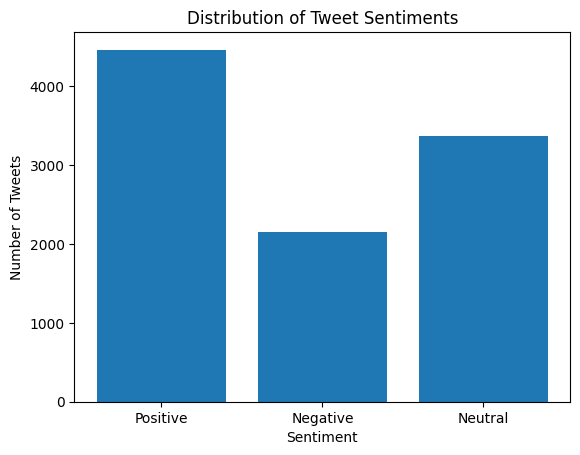

In [ ]:
# prompt: bar plot for negative positive and neutral tweets with labelling as neutral positive and neutral

import matplotlib.pyplot as plt
# Count the number of positive, negative, and neutral tweets
num_positive = df[df['category'] == 1].shape[0]
num_negative = df[df['category'] == -1].shape[0]
num_neutral = df[df['category'] == 0].shape[0]

# Create a bar plot
plt.bar(['Positive', 'Negative', 'Neutral'], [num_positive, num_negative, num_neutral])

# Add labels
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweet Sentiments')

# Show the plot
plt.show()


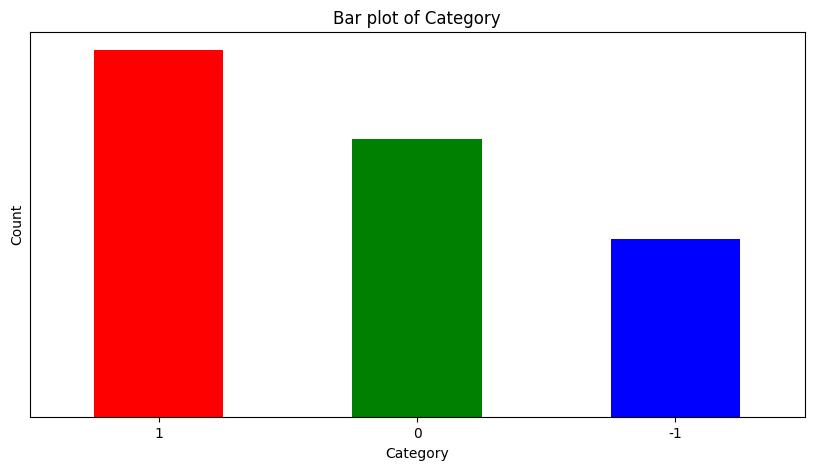

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df['category'].value_counts().plot(kind='bar', color=['red','green','blue'], figsize=(10,5))
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Bar plot of Category")
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 0000, 10000))
plt.show()



<ipython-input-19-2a0aa83ea8cc>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['length'], shade=  True)


Text(0.5, 0, 'Tweet length')

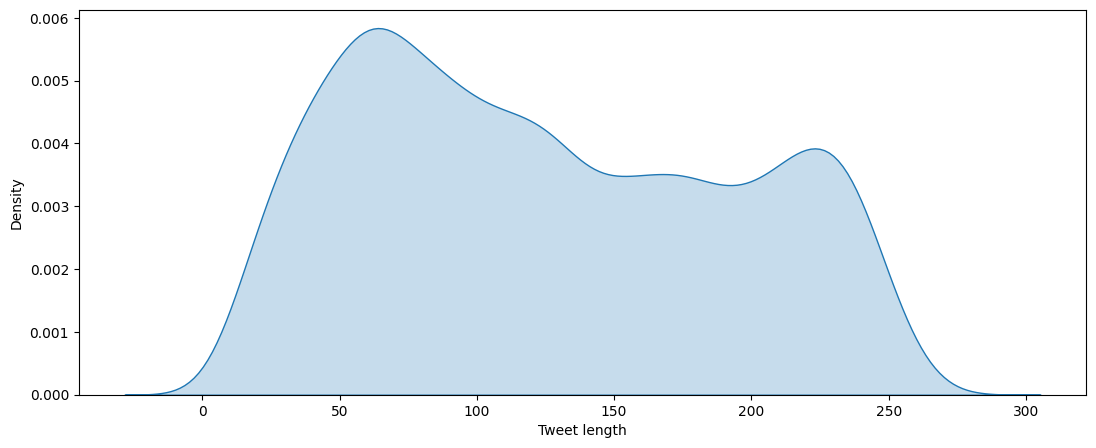

In [ ]:
plt.figure(figsize=(13,5))
sns.kdeplot(df['length'], shade=  True)
plt.xlabel("Tweet length")

<Axes: ylabel='Frequency'>

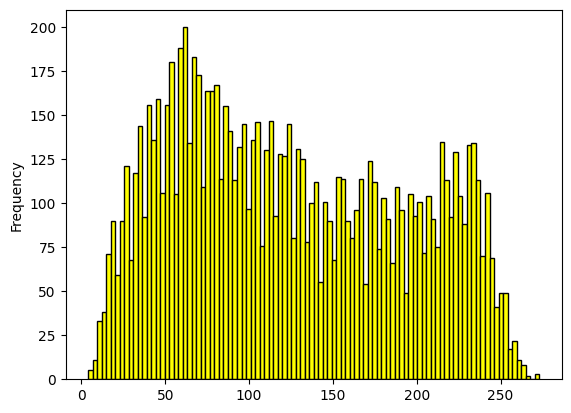

In [ ]:
df["length"].plot(bins = 100 , kind = "hist", color="yellow",edgecolor='black')

In [ ]:
df.describe()

,category,length
count,10000.000000,10000.000000
mean,0.230600,124.747300
std,0.780567,67.931072
min,-1.000000,4.000000
25%,0.000000,66.000000
50%,0.000000,116.000000
75%,1.000000,183.000000
max,1.000000,273.000000


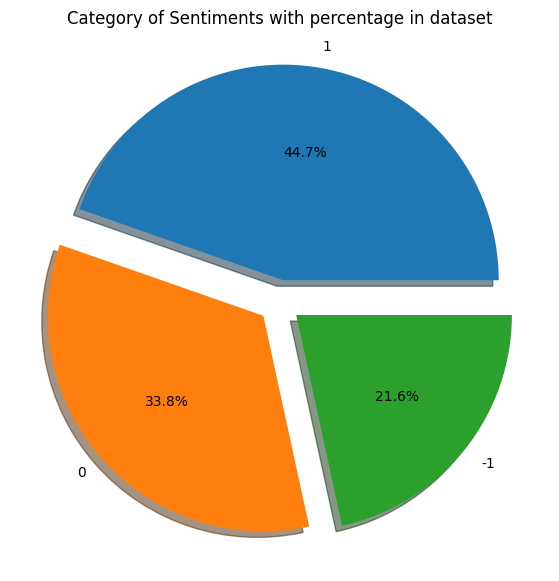

In [ ]:
import pandas as pd
explode = [0.1] * len(df["category"].value_counts())
plt.figure(figsize=(10, 7))
plt.pie(df["category"].value_counts(), labels=df["category"].value_counts().index, autopct="%1.1f%%",explode=explode, shadow=True)
plt.title("Category of Sentiments with percentage in dataset")
plt.show()

In [ ]:
df.describe()

,category,length
count,10000.000000,10000.000000
mean,0.230600,124.747300
std,0.780567,67.931072
min,-1.000000,4.000000
25%,0.000000,66.000000
50%,0.000000,116.000000
75%,1.000000,183.000000
max,1.000000,273.000000



## **get the longest message review**

In [ ]:
df[df["length"] == 273.000000]

,clean_text,category,length
93146,startup policy biggest successful policy under...,1,273



## **get the shortest message review**

In [ ]:
df[df["length"] == 1.000000]

,clean_text,category,length


## **get the average message review**


In [ ]:
df[df["length"] == 125]

,clean_text,category,length
57697,pride moment for nation great achievement our ...,1,125
23616,thread explicitly proving modi has left every ...,1,125
29132,masterpiece writing the best thing like about ...,1,125
133935,unemployment year high modi and yogi busy chan...,1,125
50587,chidambaram enough your drama dont need your m...,1,125
35937,pranam sadgurui personally feel that you shoul...,-1,125
30873,these people still asking votes stupid emotion...,-1,125
95203,pahle ground surgical strike fir hawa airstrik...,0,125
133325,assam rest northeast suffering from infiltrati...,-1,125
161009,says and bsp have lost ground during lok sabha...,0,125


# **Word Cloud**

import important modules

In [ ]:
#!pip install wordcloud
#!pip install numpy matplotlib pillow
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image

* ### **positive dataframe**

---



In [ ]:
positive_Df = df[df["category"] == 1]
positive_Df


,clean_text,category,length
102593,opportunistic alliance which has purpose other...,1,223
148753,modi winsbuy mutual fundsgood shares govt bond...,1,228
73506,modi has liberated indiabuilt india and looted...,1,122
138003,yes danger for sangh parivar they wont win thi...,1,100
77303,why narendra modis address the nation successf...,1,108
...,...,...,...
77822,this the only fitting cartoon which doesnt hav...,1,71
109442,just saw indias no1propaganda channelrepulsive...,1,241
27748,kutta bhaunke laath maro aur yeh pagal nikla m...,1,204
77114,media also have never ask modi many critical i...,1,97


In [ ]:
one_positive_state = " ".join(positive_Df["clean_text"].astype(str))
len(one_positive_state)

631723

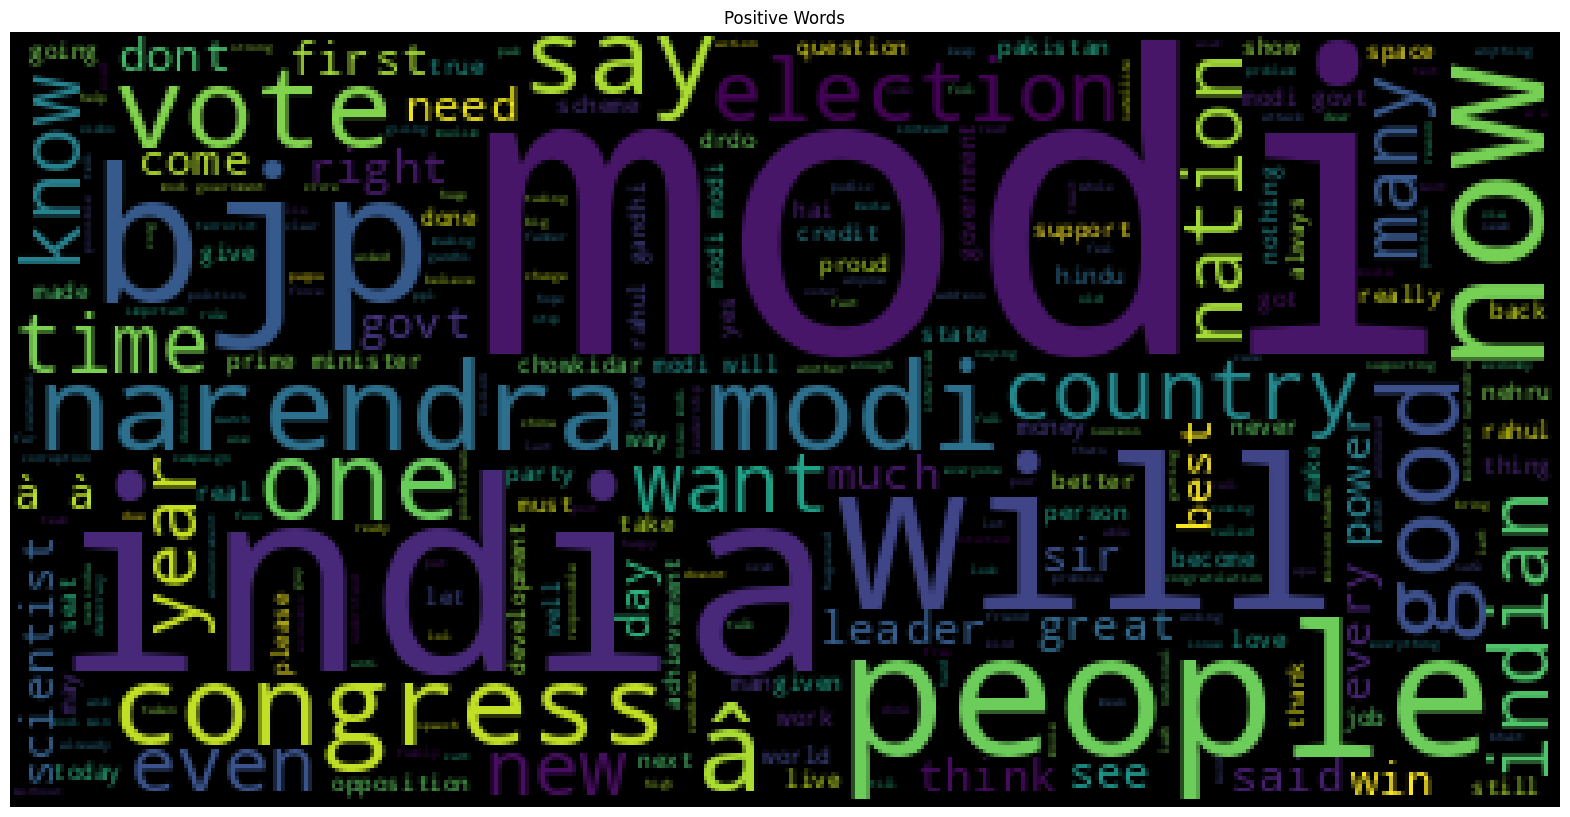

In [ ]:
plt.figure(figsize = (20,20))
text = one_positive_state

wc = WordCloud(stopwords=STOPWORDS, contour_color="black", contour_width=3, min_font_size=3, max_words=400).generate(text)
plt.imshow(wc)
plt.title("Positive Words")
plt.axis("off")
plt.show()

* ### **neutral dataframe**

---



In [ ]:
neutral_Df = df[df["category"] == 0]
neutral_Df

,clean_text,category,length
2704,shameful return gaali politics now andhra prad...,0,109
138001,kuntia dubs modi kcr thieves cong alone saviou...,0,55
84977,congress its desperation questioned the and ga...,0,157
148165,global,0,7
127794,you fear that modi may treat every indian citi...,0,93
...,...,...,...
56022,who said that these build modi matter highligh...,0,74
145921,election commission examining modis address an...,0,65
17764,got money promised modi and will vote for him ...,0,52
8516,india markets election tourism forget the taj ...,0,90


In [ ]:
one_neutral_state = " ".join(neutral_Df["clean_text"].astype(str))
len(one_neutral_state)

304901

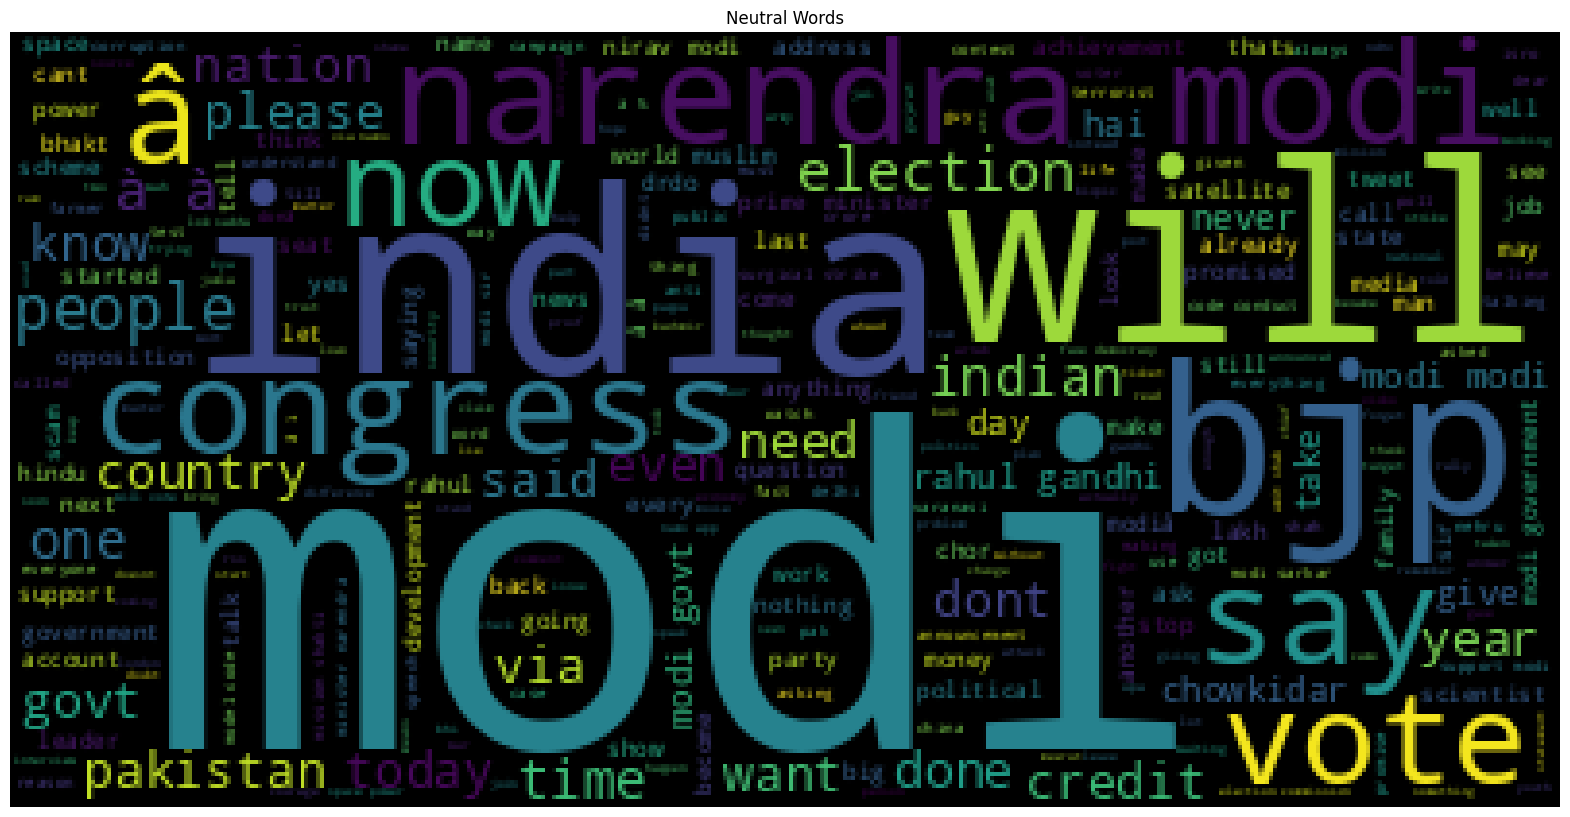

In [ ]:
plt.figure(figsize = (20,20))
text = one_neutral_state

wc = WordCloud(stopwords=STOPWORDS, contour_color="black", contour_width=3, min_font_size=3, max_words=400).generate(text)
plt.imshow(wc)
plt.title("Neutral Words")
plt.axis("off")
plt.show()

* ### **negative dataframe**

---

In [ ]:
# prompt: separate negative dataframe
negative_Df = df[df["category"] == -1]
negative_Df


,clean_text,category,length
91341,now you realized that you are losing against m...,-1,78
62588,lots fake news keep you viting for modi,-1,40
31740,you fake gandhis can never come with original ...,-1,79
142164,before placing campaign for campaigning upbiha...,-1,202
16545,seriouslyhope you are not supporting modi,-1,41
...,...,...,...
28641,âmodi journey common manâ trailer out web ...,-1,86
64013,started working\nâ¢ before modi had his first...,-1,258
114828,you are accepting that jumla modi told false p...,-1,59
123630,bjp supporters say job opportunities india hav...,-1,72


In [ ]:
one_negative_state = " ".join(negative_Df["clean_text"].astype(str))
len(one_negative_state)

320846

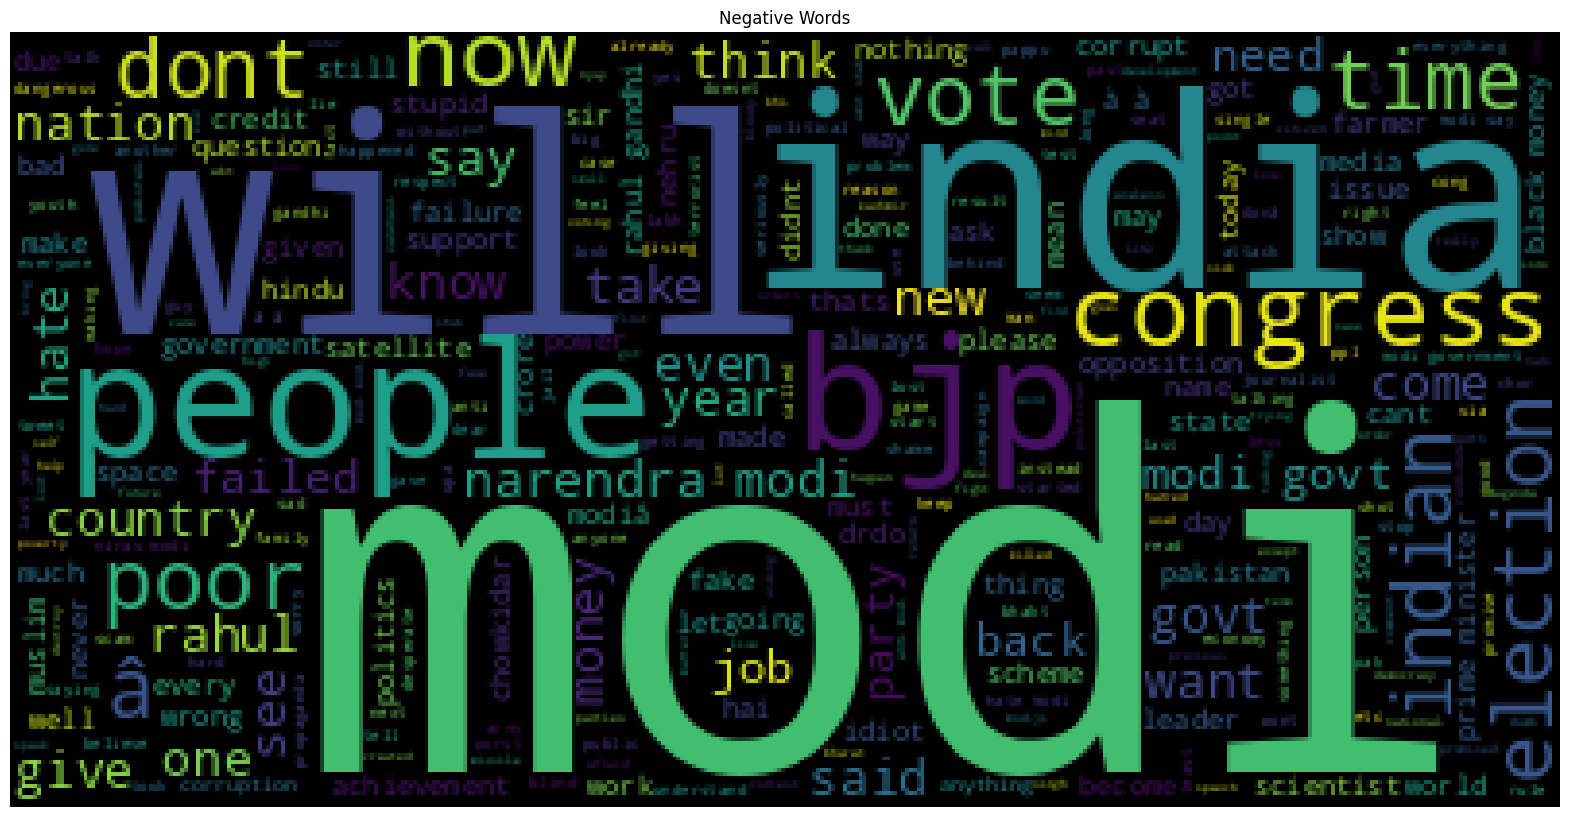

In [ ]:
plt.figure(figsize = (20,20))
text = one_negative_state

wc = WordCloud(stopwords=STOPWORDS, contour_color="black", contour_width=3, min_font_size=3, max_words=400).generate(text)
plt.imshow(wc)
plt.title("Negative Words")
plt.axis("off")
plt.show()

In [ ]:
df.head()

,clean_text,category,length
102593,opportunistic alliance which has purpose other...,1,223
148753,modi winsbuy mutual fundsgood shares govt bond...,1,228
2704,shameful return gaali politics now andhra prad...,0,109
138001,kuntia dubs modi kcr thieves cong alone saviou...,0,55
73506,modi has liberated indiabuilt india and looted...,1,122


# **TEXT CLEANING**





---


### **Creating A pipeline to remove Punctuations, Stopwords and Perform Count Vectorization**

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Store stopwords in a variable
stop_words = set(stopwords.words('english'))

def message_cleans(data_sample):
    # Use set for faster membership checking
    test_punc_removed = [char for char in data_sample if char not in string.punctuation]
    test_punc_join = "".join(test_punc_removed)
    # Use list comprehension and set membership check for stopwords
    test_punc_removed_join_clean = [word for word in test_punc_join.split() if word.lower() not in stop_words]
    return test_punc_removed_join_clean


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['clean_text'] = df['clean_text'].astype(str)
modi_tweet = df['clean_text'].apply(message_cleans)

In [ ]:
print(df['clean_text'])

102593    opportunistic alliance which has purpose other...
148753    modi winsbuy mutual fundsgood shares govt bond...
2704      shameful return gaali politics now andhra prad...
138001    kuntia dubs modi kcr thieves cong alone saviou...
73506     modi has liberated indiabuilt india and looted...
                                ...                        
27748     kutta bhaunke laath maro aur yeh pagal nikla m...
107598    had identified raghuram rajan sonias mole stoo...
151666    modi and all minister should also give intervi...
77114     media also have never ask modi many critical i...
62391              congratulations modi proud and new india
Name: clean_text, Length: 10000, dtype: object


In [ ]:
print(modi_tweet)

102593    [opportunistic, alliance, purpose, defeat, bjp...
148753    [modi, winsbuy, mutual, fundsgood, shares, gov...
2704      [shameful, return, gaali, politics, andhra, pr...
138001    [kuntia, dubs, modi, kcr, thieves, cong, alone...
73506     [modi, liberated, indiabuilt, india, looted, i...
                                ...                        
27748     [kutta, bhaunke, laath, maro, aur, yeh, pagal,...
107598    [identified, raghuram, rajan, sonias, mole, st...
151666    [modi, minister, also, give, interview, region...
77114     [media, also, never, ask, modi, many, critical...
62391            [congratulations, modi, proud, new, india]
Name: clean_text, Length: 10000, dtype: object


In [ ]:
modi_tweet = pd.Series(modi_tweet)
modi_tweet

102593    [opportunistic, alliance, purpose, defeat, bjp...
148753    [modi, winsbuy, mutual, fundsgood, shares, gov...
2704      [shameful, return, gaali, politics, andhra, pr...
138001    [kuntia, dubs, modi, kcr, thieves, cong, alone...
73506     [modi, liberated, indiabuilt, india, looted, i...
                                ...                        
27748     [kutta, bhaunke, laath, maro, aur, yeh, pagal,...
107598    [identified, raghuram, rajan, sonias, mole, st...
151666    [modi, minister, also, give, interview, region...
77114     [media, also, never, ask, modi, many, critical...
62391            [congratulations, modi, proud, new, india]
Name: clean_text, Length: 10000, dtype: object

# **Concatenating the TF_IDF and Bag of words**

---



In [ ]:
!pip install scikit-learn

In [ ]:
print(type(modi_tweet))

<class 'pandas.core.series.Series'>


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df["clean_text"]

102593    opportunistic alliance which has purpose other...
148753    modi winsbuy mutual fundsgood shares govt bond...
2704      shameful return gaali politics now andhra prad...
138001    kuntia dubs modi kcr thieves cong alone saviou...
73506     modi has liberated indiabuilt india and looted...
                                ...                        
27748     kutta bhaunke laath maro aur yeh pagal nikla m...
107598    had identified raghuram rajan sonias mole stoo...
151666    modi and all minister should also give intervi...
77114     media also have never ask modi many critical i...
62391              congratulations modi proud and new india
Name: clean_text, Length: 10000, dtype: object

# **COUNT VECTORIZATION (BAG OF WORDS)**

---



In [ ]:
# prompt: Perform count vectorisation

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_text'])

print(X.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(X.shape)

(10000, 20659)


In [ ]:
# prompt: create a dataframe containing X

import pandas as pd
df_X = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_X


,00000,000kwkajhatka,0554,0800,100,1000,10000,100000,1000000,10000rs,...,¾â,à²,à²¾,à²¾à²¾,à²¾à³,à³,ã¼ber,øªø¹ø,ù¾û,ú¾ø
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **TF-IDF PERFORMING ON THE DOCUMENTS FOR VECTORIZATION**

---



In [ ]:
# prompt: perform tf-idf on dataset

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the data
X = vectorizer.fit_transform(df['clean_text'])

# Convert the sparse matrix to a dense array
X = X.toarray()

# Print the shape of the transformed data
print(X.shape)


(10000, 20659)


In [ ]:
# prompt: create a data frame of X_combined which is a numpy.ndarray

import pandas as pd

# Convert the NumPy array to a Pandas DataFrame
df_T = pd.DataFrame(X)

# Print the DataFrame
df_T

,0,1,2,3,4,5,6,7,8,9,...,20649,20650,20651,20652,20653,20654,20655,20656,20657,20658
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **CONCATENATION OF BOTH TF-IDF AND BOW METHODS**


---



*   **TF-IDF (Term Frequency and Inverse Document Frequency)**






*   **BoW (Bag Of Words)**



In [ ]:
# prompt: combine tf-idf and  count vectorization

import numpy as np
# Concatenate the TF-IDF and Bag of Words vectors
X_combined = np.concatenate((X, df_X), axis=1)

# Print the shape of the combined vector
print(X_combined.shape)
X_combined

(10000, 41318)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# prompt: create a data frame of X_combined which is a numpy.ndarray

import pandas as pd

# Convert the NumPy array to a Pandas DataFrame
df_combined = pd.DataFrame(X_combined)

# Print the DataFrame
df_combined


,0,1,2,3,4,5,6,7,8,9,...,41308,41309,41310,41311,41312,41313,41314,41315,41316,41317
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **DataSet Splitting**

---



# **INDEPENDANT VARIABLES**

---



In [ ]:
x = df_T
print("X SHAPE : ",x.shape)
x

X SHAPE :  (10000, 20659)


,0,1,2,3,4,5,6,7,8,9,...,20649,20650,20651,20652,20653,20654,20655,20656,20657,20658
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x.shape

(10000, 20659)

# **DEPENDANT VARIABLE**

---



In [ ]:
y = df['category']
print("Y SHAPE : ",y.shape[0])
print()
y

Y SHAPE :  10000



102593    1
148753    1
2704      0
138001    0
73506     1
         ..
27748     1
107598   -1
151666    0
77114     1
62391     1
Name: category, Length: 10000, dtype: int64

# **SPLITTING TRAIN TEST DATASETS**

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

# **TRAIN & TEST NAIVE BASED CLASSIFIER MODEL**


In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier =  MultinomialNB()
NB_classifier.fit(x_train , y_train)

MultinomialNB()

<Axes: >

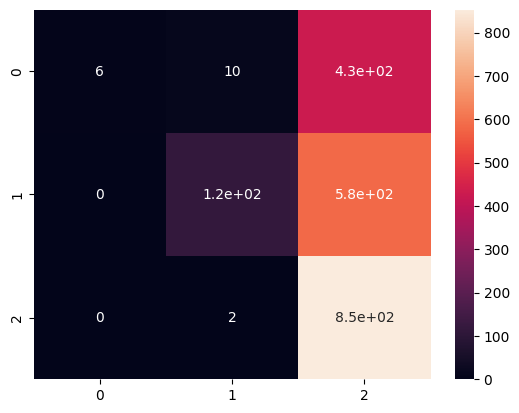

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# predicting the test result
y_pred = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm , annot = True)

In [ ]:
from sklearn.metrics import classification_report
print("******Naive Bayes using TF-IDF only*******")
print(classification_report(y_test,y_pred))

******Naive Bayes using TF-IDF only*******
              precision    recall  f1-score   support

          -1       1.00      0.01      0.02       456
           0       0.91      0.15      0.25       689
           1       0.45      1.00      0.62       855

    accuracy                           0.48      2000
   macro avg       0.79      0.38      0.30      2000
weighted avg       0.73      0.48      0.36      2000



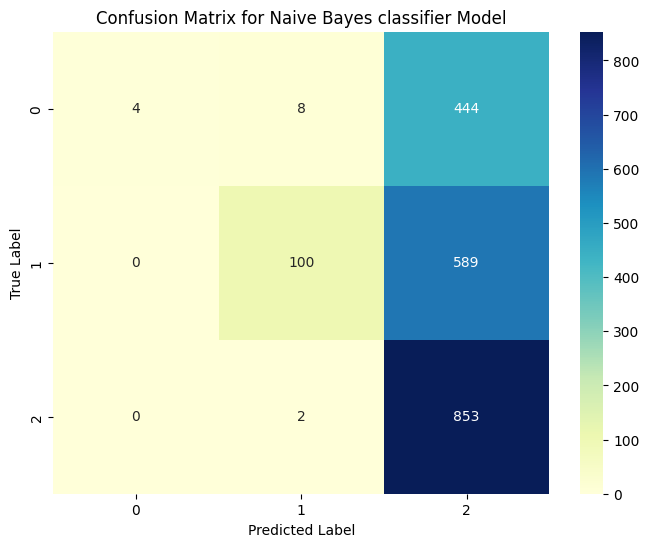

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Naive Bayes classifier Model")
plt.show()

# **Now Applying Losgistic model on this**

In [ ]:
# prompt: apply logistic model

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(x_train, y_train)

# Predict the labels for the test data
y_pred_logistic = logistic_model.predict(x_test)

# Evaluate the model's performance
accuracy_logistic = logistic_model.score(x_test, y_test)
print("Accuracy of Logistic Regression model:", accuracy_logistic)

# Print the classification report
print(classification_report(y_test, y_pred_logistic))

# Create a confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)




Accuracy of Logistic Regression model: 0.765
              precision    recall  f1-score   support

          -1       0.86      0.45      0.59       456
           0       0.73      0.85      0.78       689
           1       0.77      0.86      0.81       855

    accuracy                           0.77      2000
   macro avg       0.79      0.72      0.73      2000
weighted avg       0.78      0.77      0.75      2000



### **Training accuracy**

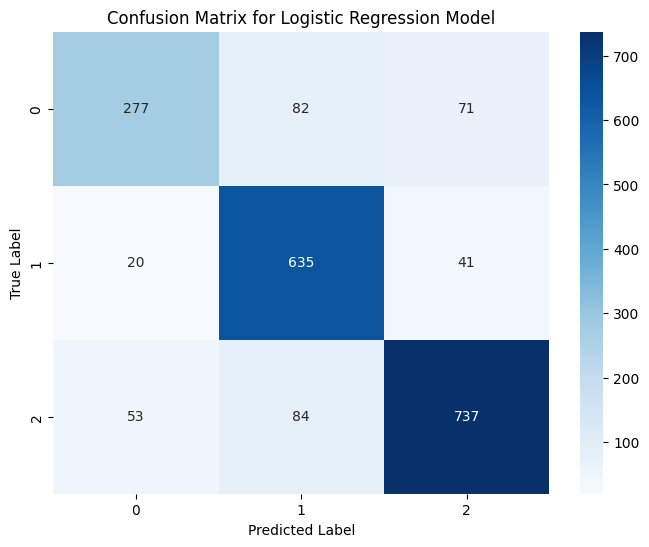

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

In [ ]:
y_predd = NB_classifier.predict(x_train)
print(classification_report(y_train,y_predd))

              precision    recall  f1-score   support

          -1       0.98      0.78      0.87      1729
           0       0.98      0.72      0.83      2680
           1       0.77      0.99      0.87      3591

    accuracy                           0.86      8000
   macro avg       0.91      0.83      0.85      8000
weighted avg       0.88      0.86      0.85      8000



In [ ]:
print(classification_report(y_test, y_pred1))

NameError: name 'y_pred1' is not defined

### **Logistic Test Accuracy check**

In [ ]:
y_test1 = model.predict(x_test)
cm = confusion_matrix(y_test , y_test1)
sns.heatmap(cm, annot = True)

NameError: name 'model' is not defined

In [ ]:
print(classification_report(y_test, y_pred1))

NameError: name 'y_pred1' is not defined

# **CATBOOST CLASSIFIER**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(verbose = 500)
# training
cat_model.fit(x_train, y_train)

Learning rate set to 0.087979
0:	learn: 1.0792775	total: 950ms	remaining: 15m 49s
500:	learn: 0.5381602	total: 4m 3s	remaining: 4m 2s
999:	learn: 0.4588707	total: 7m 22s	remaining: 0us


<Axes: >

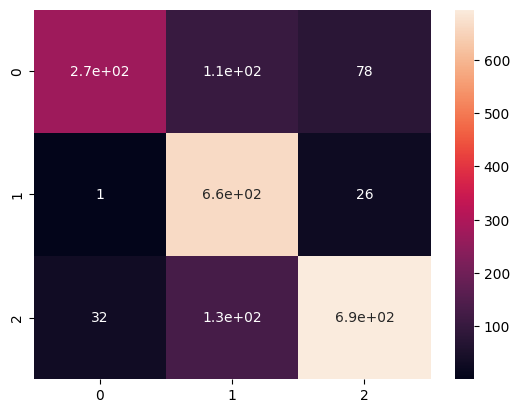

In [ ]:
y_pred2 = cat_model.predict(x_test)
cm = confusion_matrix(y_test , y_pred2)
sns.heatmap(cm, annot = True)

In [ ]:
print("********Catboost only tfidf********")
print(classification_report(y_test, y_pred2))

********Catboost only tfidf********
              precision    recall  f1-score   support

          -1       0.89      0.60      0.71       456
           0       0.74      0.96      0.83       689
           1       0.87      0.81      0.84       855

    accuracy                           0.81      2000
   macro avg       0.83      0.79      0.80      2000
weighted avg       0.83      0.81      0.81      2000



In [ ]:
df.info()
df["category"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 102593 to 62391
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean_text  10000 non-null  object
 1   category    10000 non-null  int64 
 2   length      10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


category
 1    4465
 0    3376
-1    2159
Name: count, dtype: int64

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
import pandas as pd

# Load the dataset (Assuming df is already loaded)
# df = pd.read_csv("your_dataset.csv")

# Preprocess the data
df["category"] = df["category"].astype(int)

# Create a tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Encode the text
encoded_data = tokenizer.batch_encode_plus(
    df["clean_text"].values.tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    padding="max_length",
    max_length=64,  # Adjust max_length based on your dataset and available memory
    return_tensors="tf",
    truncation=True,
)

# Create a TensorFlow dataset
input_ids = encoded_data["input_ids"]
attention_masks = encoded_data["attention_mask"]

dataset = tf.data.Dataset.from_tensor_slices((input_ids, attention_masks, df["category"].values))
dataset = dataset.shuffle(100).batch(16)  # Reduce batch size

# Load the BERT model
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

# Train the model
model.fit(dataset, epochs=5)

# Evaluate the model
evaluation = model.evaluate(dataset)
print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])



In [ ]:
# prompt: apply RNN MODEL to df dataset
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input, GlobalMaxPooling1D, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

#--------------------------------------------------------------------------
import tensorflow as tf
import tensorflow_hub as hub
max_length = df['clean_text'].str.len().max()
#--------------------------------------------------------------------------
# Define the model
inputs = Input(shape=(max_length,), name="input_layer")
inputs = tf.expand_dims(inputs, axis=0)

# Use pre-trained word embeddings or remove this line if you want to train embeddings from scratch
# embedding_layer = Embedding(vocab_size, embedding_dim, input_length=max_length)(inputs)

lstm_layer = LSTM(128, return_sequences=True)(inputs)
# Add Batch Normalization for stability
lstm_layer = BatchNormalization()(lstm_layer)

# You can try Bidirectional LSTM for better representation learning
# lstm_layer = Bidirectional(LSTM(128, return_sequences=True))(embedding_layer)
global_max_pooling_layer = GlobalMaxPooling1D()(lstm_layer)
dropout_layer = Dropout(0.2)(global_max_pooling_layer)
outputs = Dense(3, activation="softmax")(dropout_layer)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
model.fit(dataset, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
evaluation = model.evaluate(dataset)
print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])



In [ ]:
print(inputs.shape)

# **RNN**

In [ ]:
# prompt: split dataset df into train and test for RNN

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)


In [ ]:
def build_vocabulary(text_corpus):
  """
  Builds a vocabulary from a text corpus.

  Args:
    text_corpus: A list of strings representing the text corpus.

  Returns:
    A dictionary mapping words to their frequency in the corpus.
  """
  vocabulary = {}
  for text in text_corpus:
    for word in text.split():
      word = word.lower().strip()
      if word not in vocabulary:
        vocabulary[word] = 0
      vocabulary[word] += 1
  return vocabulary

In [ ]:
!pip install genism

In [ ]:
# prompt: Now apply RNN
vocab_size = 10000  # Replace with the actual vocabulary size
embedding_dim = 128  # Replace with the desired embedding dimension
max_length = 100  # Replace with the maximum sequence length
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=10)

# Evaluate the model
evaluation = model.evaluate(X_test, y_test)
print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])


# **Dont Touch me!!!!!!!!!!**

## **Download the required NLTK data:**

In [ ]:
text = ["Hello and welcome friends","Arman Ishu and Shoaib love teaching" , "Arman Ishu and shoaib love to play cricket"]

In [ ]:
# prompt: convert above list as data frame and name of the column as text

import pandas as pd
data = {'text': ["Hello and welcome friends","Arman Ishu and Shoaib love teaching" , "Arman Ishu and shoaib love to play cricket"]}
df = pd.DataFrame(data)
df


,text
0,Hello and welcome friends
1,Arman Ishu and Shoaib love teaching
2,Arman Ishu and shoaib love to play cricket


In [ ]:
# prompt: perform  tf-idf and bow concatenation on above text col

import numpy as np
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer_tfidf = TfidfVectorizer()

# Fit and transform the data
X_tfidf = vectorizer_tfidf.fit_transform(df['text'])

# Create a CountVectorizer object
vectorizer_bow = CountVectorizer()

# Fit and transform the data
X_bow = vectorizer_bow.fit_transform(df['text'])

# Concatenate the TF-IDF and Bag of Words vectors
X_combined = np.concatenate((X_tfidf.toarray(), X_bow.toarray()), axis=1)

# Print the concatenated vector
print(X_combined)


[[0.32274454 0.         0.         0.54645401 0.54645401 0.
  0.         0.         0.         0.         0.         0.54645401
  1.         0.         0.         1.         1.         0.
  0.         0.         0.         0.         0.         1.        ]
 [0.30861775 0.39740155 0.         0.         0.         0.39740155
  0.39740155 0.         0.39740155 0.52253528 0.         0.
  1.         1.         0.         0.         0.         1.
  1.         0.         1.         1.         0.         0.        ]
 [0.2482013  0.31960436 0.42024133 0.         0.         0.31960436
  0.31960436 0.42024133 0.31960436 0.         0.42024133 0.
  1.         1.         1.         0.         0.         1.
  1.         1.         1.         0.         1.         0.        ]]


In [ ]:
# prompt: convert above X_combined to dataframe

import pandas as pd
import numpy as np
df_combined = pd.DataFrame(X_combined, columns=np.concatenate((vectorizer_tfidf.get_feature_names_out(), vectorizer_bow.get_feature_names_out())))
df_combined


,and,arman,cricket,friends,hello,ishu,love,play,shoaib,teaching,...,cricket,friends,hello,ishu,love,play,shoaib,teaching,to,welcome
0,0.322745,0.000000,0.000000,0.546454,0.546454,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.308618,0.397402,0.000000,0.000000,0.000000,0.397402,0.397402,0.000000,0.397402,0.522535,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.248201,0.319604,0.420241,0.000000,0.000000,0.319604,0.319604,0.420241,0.319604,0.000000,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
# prompt: print the list of positive words classified

positive_words = [word for word in one_positive_state.split() if word not in stop_words]
positive_words)


['opportunistic', 'alliance', 'purpose', 'defeat', 'bjp', 'going', 'achieve', 'going', 'vote', 'bjp', 'bjp', 'name', 'modibcz', 'vision', 'development', 'others', 'vision', 'stop', 'onlyso', 'better', 'elect', 'development', 'modi', 'winsbuy', 'mutual', 'fundsgood', 'shares', 'govt', 'bonds', 'cong', 'wins', 'buy', 'agriculture', 'land', 'take', 'agriculture', 'loans', '3rd', 'front', 'wins', 'sell', 'buy', 'gold', 'wait', 'next', 'elections', 'within', 'chances', 'elections', 'within', 'yrs', 'better', 'buy', 'liqour', 'stock', 'modi', 'liberated', 'indiabuilt', 'india', 'looted', 'india', 'india', 'become', 'orphan', 'without', 'chowkidar', 'bhagato', 'think', 'positive', 'yes', 'danger', 'sangh', 'parivar', 'wont', 'win', 'time', 'dealt', 'role', 'terrorism', 'narendra', 'modis', 'address', 'nation', 'successful', 'antisatellite', 'missile', 'test', 'unlikely', 'attract', 'action', 'via', 'congratulations', 'modi', 'golden', 'moment', 'modi', 'govt', 'says', 'terror', 'talks', 'canâ